# Casestudy - Einführung

Ziel dieser Case-Study ist es, die Beliebtheit der am Markt erhältlichen Süßwaren hinsichtlich spezieller Charakterstika zu untersuchen. Dabei sollen die Auswirkungen der Charakteristika hinstilich Beliebheit analysiert werden um aufbauend darauf Handlungsempfehlungen für die Erweiterung des Süßwarensortiments zu entwickeln.

Der Datensatz wird [hier](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) zur Verfügung gestellt.

Die Story hinter diesen Daten kann [hier](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking)
gefunden werden

Der vorleigende Datensatz enthält Informationen über die Beliebtheit und Charaktersitika von Süßigkeiten zu Halloween im US-Amerikanischen Markt. Daher lassen sich nur bedingt Rückschlüsse für ein ganzjähriges Einzelhandelsgeschäft in Deutschland ziehen. 
Daher gilt folgende Annahme: Der Datensatz eignet sich für die nachfolgende Analyse und enthält kein BIAS aufgrund der Halloween spefizischen Umfrage im US-Amerikanischen Markt.  

candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no

    chocolate | Does it contain chocolate?
    fruity | Is it fruit flavored?
    caramel | Is there caramel in the candy?
    peanutalmondy | Does it contain peanuts, peanut butter or almonds?
    nougat | Does it contain nougat?
    crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
    hard | Is it a hard candy?
    bar | Is it a candy bar?
    pluribus | Is it one of many candies in a bag or box?
    sugarpercent | The percentile of sugar it falls under within the data set.
    pricepercent | The unit price percentile compared to the rest of the set.
    winpercent | The overall win percentage according to 269,000 matchups.

Zum besseren Verständnis des Datensatzes werden nachfolgend einige simple deskriptive Analysen durchgeführt.

# Vorbereitung und deskriptive Analyse 
Zunächst erfolgt die Einbindung der benötigten Bibliotheken, sowie das Einlesen des Datensatzes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
inhalt = ["chocolate", "fruity", "nougat", "crispedricewafer", "peanutyalmondy", "caramel"]
form = ["bar", "pluribus", "hard"]
combined = inhalt + form + ["pricepercent", "sugarpercent"]


candy = pd.read_csv("candy-data.csv")
#candy.sort_values(by="pricepercent", ascending=True).head()

C:\Users\Work\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
print(candy.info())
print(candy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB
None
       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.00000

In [3]:
print("Top 3:")
print(candy.sort_values(by="winpercent", ascending=False).head(3))
print("\n Flop3:")
print(candy.sort_values(by="winpercent").head(3))

Top 3:
               competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52  ReeseÕs Peanut Butter cup          1       0        0               1   
51         ReeseÕs Miniatures          1       0        0               1   
79                       Twix          1       0        1               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0         0.720         0.651   
51       0                 0     0    0         0         0.034         0.279   
79       0                 1     0    1         0         0.546         0.906   

    winpercent  
52   84.180290  
51   81.866257  
79   81.642914  

 Flop3:
        competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
44           Nik L Nip          0       1        0               0       0   
7   Boston Baked Beans          0       0        0               1       0   
12            Chiclets          0       1       

Nachfolgend werden Süßwaren, welche keine inhaltlichen oder strukturgebenden Charakteristika aufweisen dargestellt und gesondert analysiert.

In [4]:
candy_copy = candy.copy()
candy_copy["form"] = candy["hard"] + candy["bar"] + candy["pluribus"]
candy_copy["inhalt"] = candy["chocolate"] + candy["fruity"] + candy["peanutyalmondy"] + candy["nougat"] +\
                       candy["crispedricewafer"] + candy["caramel"]
print(candy_copy[candy_copy["form"]==0])
print(candy_copy[candy_copy["inhalt"]==0])

                 competitorname  chocolate  fruity  caramel  peanutyalmondy  \
2                      One dime          0       0        0               0   
3                   One quarter          0       0        0               0   
4                     Air Heads          0       1        0               0   
9            Caramel Apple Pops          0       1        1               0   
29                  Laffy Taffy          0       1        0               0   
31  Lifesavers big ring gummies          0       1        0               0   
51           ReeseÕs Miniatures          1       0        0               1   
52    ReeseÕs Peanut Butter cup          1       0        0               1   
54  ReeseÕs stuffed with pieces          1       0        0               1   
71                  Sugar Daddy          0       0        1               0   
72                 Super Bubble          0       1        0               0   
75         Tootsie Roll Juniors          1       0  

`One dime`, sowie `one quater` können aus dem Datensatz entfernt werden, da dadurch keine Erkenntnisse bzgl. einer Süßwarenkreation erhalten werden können. 

Außerdem wurden einige Anpassungen bzgl. der Zuordnung der Charakteristika vorgenommen. Dazu wurden die Süßwaren betrachtet, welche keine inhaltlichen oder formgebenden Charakterstika zugeschrieben wurden.

Folgende Süßwaren weisen keine inhaltlichen Eigenschaften auf:
- Candy Corn
- Haribo Happy Cola ~Fruchtgummi mit Cola-Geschmack --><font color=red>fruity</font>
- Pixie Sticks
- Root Beer Barrels 

Folgende Süßwaren weißen keine formgebenden Eigenschaften auf:
- Air Heads -->chewy
- Caramel Apple Pops --><font color=red>hard</font>
- Laffy Taffy -->chewy
- Lifesavers big ring gummies
- ReeseÕs Miniatures
- ReeseÕs Peanut Butter cup
- ReeseÕs stuffed with pieces
- Sugar Daddy --><font color=red>hard</font>
- Super Bubble -->chewy
- Tootsie Roll Juniors -->chewy
- Twizzlers -->chewy

Diese Süßwaren werden nachfolgend gesondert beobachtet, um evtl. eindeutige Zuordnungen vornehmen zu können.



In [5]:
#candy = candy.drop([2,3], axis=0)

#candy = candy.set_value(19, "fruity", 1).copy()
#candy = candy.set_value(9, "hard", 1).copy()
#candy = candy.set_value(71, "hard", 1).copy()

C:\Users\Work\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Work\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Work\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


Zu erkennen war weiterhin, dass die Variablen `sugarpercent`, `pricepercent` und `winpercent` in metrischer Form vorliegen, während alle anderen Variablen als kategoriale Variablen in dichotomer Form dargestellt sind (binärcodiert, siehe dazu auch Dummykodierung)

Im nächsten Schritt werden die metrischen und binaärcordierten Variablen für nachvolgende Analysen in seperaten Listen gespeichert. Weiterhin wird ein DataFrame mit allen unabhängigen Variablen (`candy_ratio`) sowie ein DataFrame mit der abhängigen Variable (`candy_target`) erstellt.
Da der Einfluss von verschiedenen Charaktersitika auf die Beliebtheit analysiert werden soll, stellt die Spalte `winpercent` die abhängige Variable dar. 

In [6]:
cols_ratio = ["sugarpercent", "pricepercent"]
cols_ratio_bin = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
cols_target = ["winpercent"]

candy_ratio = candy.loc[:,cols_ratio + cols_ratio_bin]
candy_target = candy.loc[:,cols_target]


Für die metrisch skalierten Variablen eignet sich die Darstellung als scatterplot um einen ersten Eindruck zu erlangen 
und eventuelle linearen oder sonstige Zusammenhänge erkennen zu können.

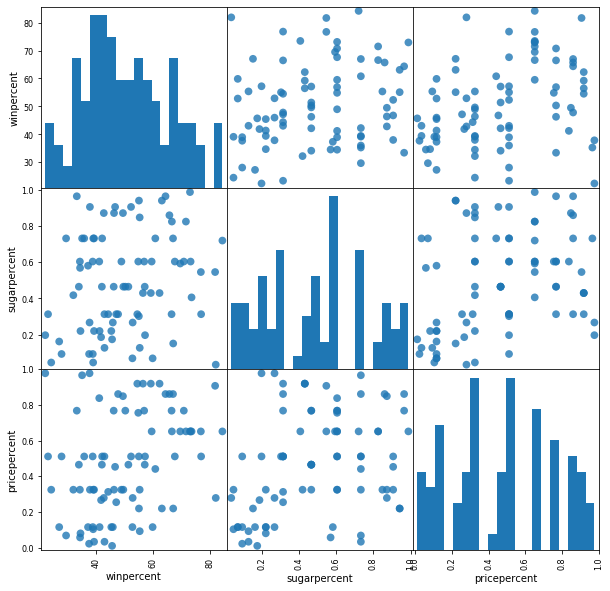

In [7]:
grr = pd.plotting.scatter_matrix(candy[cols_target + cols_ratio]
                                 ,figsize=(10, 10)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

Anhand des scatterplots lassen sich keine linearen oder sonstigen Zusammenhänge zwischen winpercent und pricepercent oder sugarpercent erkennen.


# Korrelationsanalyse
Zum weiteren Verständnis des Einflusses der Charakteristika auf die Beliebtheit folgt zunächst eine Korrelationsanalyse:

In [8]:
from scipy.stats import pearsonr
liste = ["pricepercent","sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
X = candy_ratio[liste]
y = candy["winpercent"]

corr_count = {}
for index in liste:
    corr, p = pearsonr(y, X[index])
    corr_count[index]=corr

keys_sort = sorted(corr_count, key=corr_count.get, reverse=True)  

i=0    
for i in keys_sort:
    print("Korrelationskoeffizient", i, "~winpercent")
    print(corr_count[i],"\n")

Korrelationskoeffizient chocolate ~winpercent
0.6323734622039238 

Korrelationskoeffizient bar ~winpercent
0.42520348478846953 

Korrelationskoeffizient peanutyalmondy ~winpercent
0.40289239314051684 

Korrelationskoeffizient pricepercent ~winpercent
0.3338611144196428 

Korrelationskoeffizient crispedricewafer ~winpercent
0.32265001624319306 

Korrelationskoeffizient caramel ~winpercent
0.207772329533207 

Korrelationskoeffizient sugarpercent ~winpercent
0.20763497996748553 

Korrelationskoeffizient nougat ~winpercent
0.19598659692788556 

Korrelationskoeffizient pluribus ~winpercent
-0.2725841061184999 

Korrelationskoeffizient hard ~winpercent
-0.3778862261754357 

Korrelationskoeffizient fruity ~winpercent
-0.4316037381786226 



Grafische Darstellung der Korrelationsanalyse:

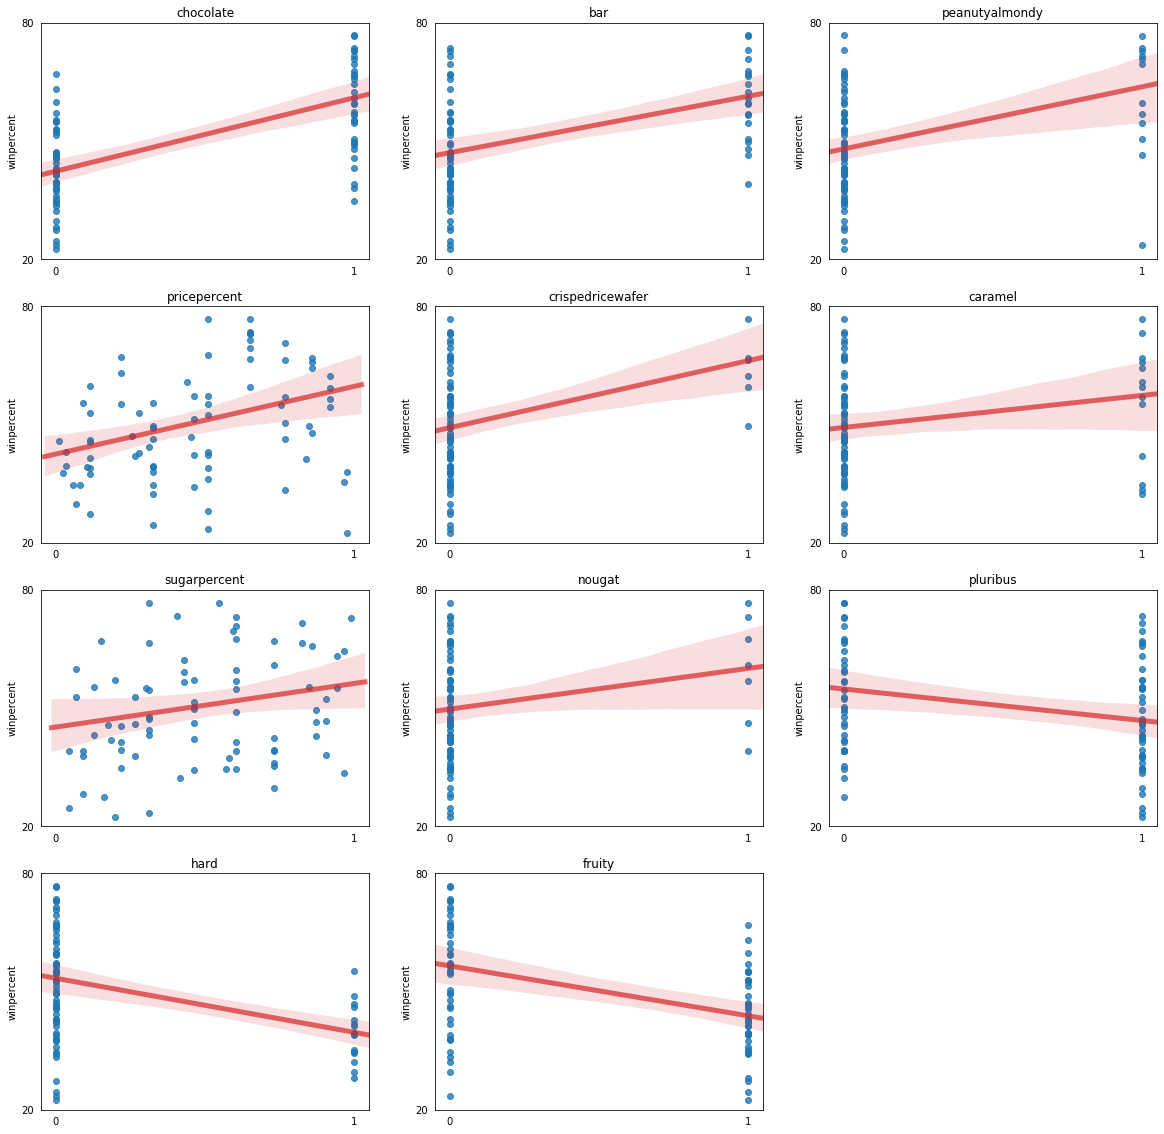

In [9]:
fig = plt.figure(figsize=(20,20))

for i in range(11):
    ax = fig.add_subplot(4,3,i+1)
    #ax.scatter(X[keys_sort[i]], y, color = 'tab:blue') 
    sns.regplot(x=X[[keys_sort[i]]], y=y, line_kws={"color":"tab:red","alpha":0.7,"lw":5})
    ax.set(title=keys_sort[i])
    ax.set_yticks([20,80])
    ax.set_xticks([0,1])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(20,80)
    ax.tick_params(bottom=False ,top=False, left=False, right=False)
    if (i==0 or i==3 or i==6 or i==9):
        ax.set(ylabel="winpercent")        
plt.show()

# Regressionsanalyse
## Modell und Resultate
Im nächsten Schritt erfolgt die multivariate Regressionsanalyse (OLS).
Warum Regression? Erlaubt die Analyse welche Merkmale sich auf welche Weise auf die abhängige Variable auswirken.

- Hypothese: Besteht ein (signifikanter) Einfluß der Charakteriska auf die abhängige Variable `winpercent`?
    - H1:b1,...,bn &ne; 0
    - H0:b1,...,bn = 0

In [10]:
X = candy[combined]
#[["sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus","pricepercent"]]
X = sm.add_constant(X)
y = candy["winpercent"]

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     7.915
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           8.75e-09
Time:                        17:03:18   Log-Likelihood:                -307.42
No. Observations:                  83   AIC:                             638.8
Df Residuals:                      71   BIC:                             667.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               33.7244      5.309  

C:\Users\Work\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Anhand der Resultate können für die 4 Charakteristika `chocolate`, `peanutyalmondy`,`fruity`, sowie `sugarpercent` ein positiver Einfluss auf die Beliebtheit mit statisischer Signifikanz (alpha=0.05) unterstellt werden.
Für die Eigenschaft `hard` kann hingegen ein negativer Einfluss auf die Beliebtheit mit statistischer Signifikanz (alpha=0.05) unterstellt werden.

## Grafische Residuen-Analyse

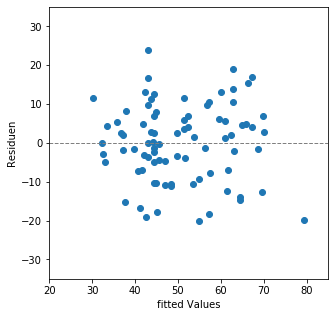

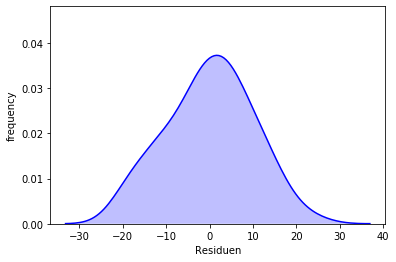

In [11]:
residuals = sm.OLS(y,X).fit().resid
fitted_values = model.fittedvalues
f, ax = plt.subplots(figsize=(5,5))
plt.scatter(fitted_values, residuals) 
plt.hlines(0,20,85, color="grey", linestyle="dashed", linewidth=1)
ax.set_ylim(-35,35)
ax.set(ylabel="Residuen", xlabel="fitted Values") 
ax.set_xlim(20,85)
plt.show()
sns.distplot(residuals,hist= True, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
plt.xlabel("Residuen")
plt.ylabel("frequency")
plt.show()

## Grafische Darstellung

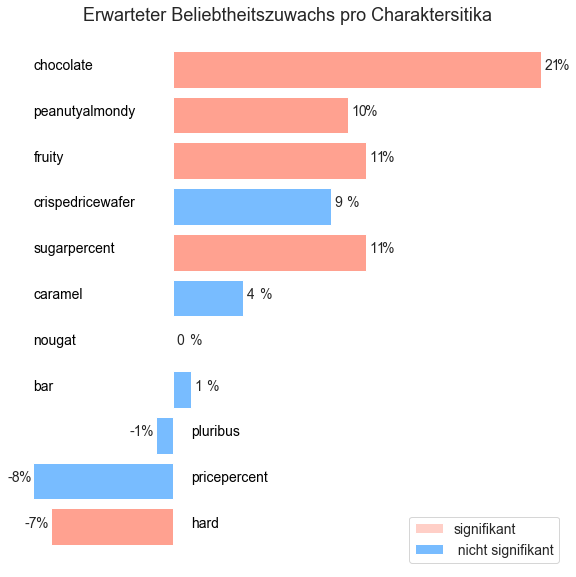

In [34]:
sns.set_style(style="white", rc=None)


see_names = 1 #set = 1 for visible labels, 0 for invisible
fig, ax = plt.subplots(figsize=(10,10))
names = ["hard", "pricepercent", "pluribus", "bar", "nougat", "caramel", "sugarpercent", "crispedricewafer", "fruity", "peanutyalmondy", "chocolate"]

size = [round(-7.2418), round(-7.8495), round(-1.0387),\
        round(0.7759),round(-0.2376), round(3.9480),round(10.5210),\
        round(8.5864), round(10.5469),round(10.4682),round(20.5526)]
plt.barh(names, size, color = ((1,0.3882,0.2784,0.6),(0.1176,0.5647,1,0.6),\
                               (0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),\
                               (0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),\
                               (1,0.3882,0.2784,0.6),(0.1176,0.5647,1,0.6),\
                               (1,0.3882,0.2784,0.6),(1,0.3882,0.2784,0.6),(1,0.3882,0.2784,0.6)))
ax.tick_params(bottom=False, left=False, top=False, right=False)
plt.barh(0,0, color=(1,0.3882,0.2784,0.3), label="signifikant")
plt.barh(0,0, color=(0.1176,0.5647,1,0.6), label=" nicht signifikant")

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("Erwarteter Beliebtheitszuwachs pro Charaktersitika", fontsize=18) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for i in range(3):
    if see_names == 1:
        ax.text(1,i,names[i],fontsize=14,color="black")
    ax.text(size[i]-1.5,i,size[i], fontsize=14,)
    ax.text(size[i]-0.9,i,"%", fontsize=14,)

for i in range(3,11):
    if see_names == 1:
        ax.text(-8,i,names[i],fontsize=14,color="black")
    ax.text(size[i]+0.2,i,size[i], fontsize=14,)
    ax.text(size[i]+0.9,i,"%", fontsize=14,)

ax.legend(fontsize=14, loc="lower right")
plt.savefig('barchart2.pdf', transparent=True)
plt.savefig('barchart2.png', transparent=True)
plt.show()


## Schlussfolgerungen

Die Charakteristika `chocolate`, `fruity`, `peanutyalmondy` sowie `sugarpercent` weisen einen statitisch signifikanten(alpha=0.05) positiven Einfluss auf die Beliebtheit von Süßwaren aus.
Die Verwendung der formgebenden Charakteristika `hard` weist einen statistisch signifikanten (alpha=0.05) negativen
Einfluss auf die Beliebtheit der Süßwaren auf.

Durch den Einsatz der Charakteristika `chocolate` lässt sich Beliebtheitssteigerung von ca.20% erwarten (`fruity`/`peanutyalmondy` -> 9%/10%). Durch den Einsatz der formgebenden Eigenschaft `hard` lässt sich eine Reduzierung der Beliebtheit um ca. 7% erwarten.

# Analyse der Struktur der Süßwaren auf Basis der Häufigkeitsverteilung

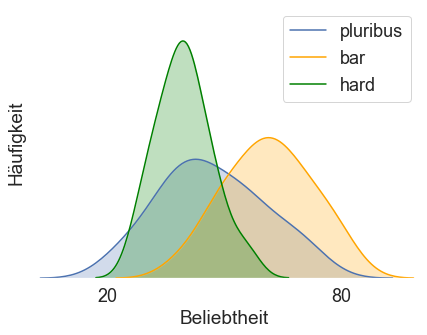

In [59]:
sns.set(rc={'axes.facecolor':(1,1,1,0), 'figure.facecolor':(1,1,1,0)})

candy5 = candy[candy["bar"]==1]
candy6 = candy[candy["pluribus"]==1]
candy7 = candy[candy["hard"]==1]
fig, ax = plt.subplots(figsize=(7,5))


ax1 = sns.distplot(candy6["winpercent"], label="pluribus",hist=False, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax2 = sns.distplot(candy5["winpercent"], label="bar",hist=False, color = "orange", kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax3 = sns.distplot(candy7["winpercent"], label="hard",hist=False, color = "green", kde_kws={"shade": True}, hist_kws=dict(alpha=0))
plt.tick_params(bottom=False, left=False, top=False, right=False)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
#ax1.spines["buttom"].set_visible(False)
plt.ylim(0,0.06)
plt.xlim(0,100)
plt.xlabel("Beliebtheit", fontsize=19)
plt.ylabel("Häufigkeit", fontsize=19)
plt.xticks([20,80],fontsize=18)
plt.yticks([])
#plt.title("Histogram zur Analyse der äußeren Erscheinung der Süßware", fontsize=18) 
plt.legend(fontsize=18, facecolor=(1,1,1,0.3))
#plt.tight_layout()

plt.savefig('histogram.pdf')
plt.savefig('histogram.png',tranparent=True)
plt.show()

# Vergleich der Zuckeranteile 

mean sugarpercent for bars: 0.5277142742857143
estimated sugarpercent peanutalmondy bar with chocolate: 18.75
estimated sugarpercent peanutalmondy bar with fruity: 21.6


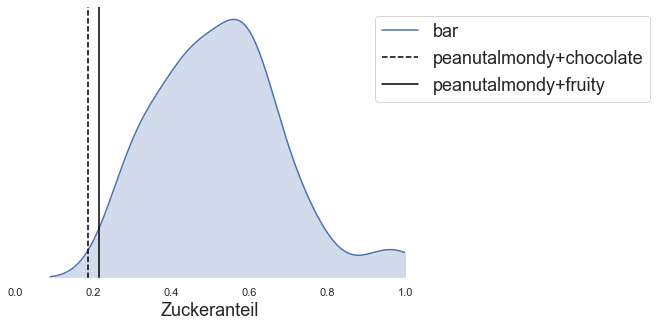

In [68]:
#sns.set(rc={'axes.facecolor':(1,1,1,0), 'figure.facecolor':(1,1,1,0)})

bars = candy[candy["bar"]==1]

print("mean sugarpercent for bars:", bars["sugarpercent"].mean())
print("estimated sugarpercent peanutalmondy bar with chocolate: 18.75")
print("estimated sugarpercent peanutalmondy bar with fruity: 21.6")
#print("mean sugarpercent overall :", candy["sugarpercent"].mean())
fig, ax = plt.subplots(figsize=(7,5))

ax1 = sns.distplot(bars["sugarpercent"], label="bar",hist=False, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
#ax11 = sns.distplot(bars["sugarpercent"], hist=True, kde=True)
#ax2 = sns.distplot(candy["sugarpercent"], label="overall",hist=False, color = "g",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
#ax22 = sns.distplot(candy["sugarpercent"], hist=True, kde=True)
ax3 = plt.axvline(0.1875, color="black", linestyle="dashed", label="peanutalmondy+chocolate")
ax4 = plt.axvline(0.216, color="black", linestyle="solid", label="peanutalmondy+fruity")
plt.tick_params(bottom=False, left=False, top=False, right=False)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
#ax1.spines["buttom"].set_visible(False)
#plt.ylim(0,0.06)
plt.xlim(0,1)
plt.xlabel("Zuckeranteil", fontsize=18)
#plt.xticks([20,80],fontsize=18)
plt.yticks([])
#plt.title("Histogram zur Analyse der äußeren Erscheinung der Süßware", fontsize=18) 
ax.legend(fontsize=18, facecolor=(1,1,1,0.3), bbox_to_anchor=(0.5, 0, 1.15, 1),ncol=1)
#plt.tight_layout()

plt.savefig('histogram_bar_sugar.pdf')
plt.savefig('histogram_bar_sugar.png',tranparent=True)
plt.show()
